In [2]:
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

plt.rc('font', family='NanumBarunGothic')

In [5]:
merged_df = pd.read_csv('../data/ott_time_label_encoded.csv')

In [9]:
merged_df = merged_df.drop(columns=['PID', '학력'])

In [10]:
merged_df

,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
0,남,20대,사무직,6,3
1,남,10대,학생,6,6
2,남,40대,사무직,4,6
3,남,50세 이상,서비스/판매직,6,6
4,남,30대,사무직,6,0
...,...,...,...,...,...
5253,여,30대,서비스/판매직,3,3
5254,여,50세 이상,주부,3,3
5255,여,20대,무직,6,7
5256,여,50세 이상,주부,4,4


In [11]:
print(merged_df.shape)
merged_df.head()

(5258, 5)


,성별,연령,직업,ott 주중 이용시간대,ott 주말 이용시간대
0,남,20대,사무직,6,3
1,남,10대,학생,6,6
2,남,40대,사무직,4,6
3,남,50세 이상,서비스/판매직,6,6
4,남,30대,사무직,6,0


In [12]:
merged_df[(merged_df['연령'] == '10대') & (merged_df['연도']==2019)]

KeyError: '연도'

In [6]:
merged_df.groupby(['연령', '성별', 'ott 주중 이용시간대']).count().head(10)

직업  ott 주말 이용시간대  연도
연령  성별 ott 주중 이용시간대                      
10대 남  12:00~14:59   14            14  14
       15:00~17:59   23            23  23
       18:00~20:59   37            37  37
       21:00~23:59   75            75  75
       24:00~5:59     7             7   7
       이용하지 않음       10            10  10
    여  12:00~14:59    9             9   9
       15:00~17:59   20            20  20
       18:00~20:59   36            36  36
       21:00~23:59   67            67  67

- 10대 남자가 선호하는 시간대 위와 같이

10대 남,

10대 여,  x 5

# column별 데이터 타입 

In [7]:
merged_df.dtypes

성별              object
연령              object
직업              object
ott 주중 이용시간대    object
ott 주말 이용시간대    object
연도               int64
dtype: object

In [8]:
print(f'{merged_df.columns[0]} : {type(merged_df.iloc[0,0])}')
print(f'{merged_df.columns[1]} : {type(merged_df.iloc[0,1])}')
print(f'{merged_df.columns[2]} : {type(merged_df.iloc[0,2])}')
print(f'{merged_df.columns[3]} : {type(merged_df.iloc[0,3])}')
print(f'{merged_df.columns[4]} : {type(merged_df.iloc[0,4])}')
print(f'{merged_df.columns[5]} : {type(merged_df.iloc[0,5])}')

성별 : <class 'str'>
연령 : <class 'str'>
직업 : <class 'str'>
ott 주중 이용시간대 : <class 'str'>
ott 주말 이용시간대 : <class 'str'>
연도 : <class 'numpy.int64'>


In [9]:
order = ['6:00~8:59',
 '9:00~11:59',
 '12:00~14:59',
 '15:00~17:59',
 '18:00~20:59',
 '21:00~23:59',
 '24:00~5:59',
 '이용하지 않음']

# 나이대별 주중, 주말 ott 이용시간 

NameError: name 'order' is not defined

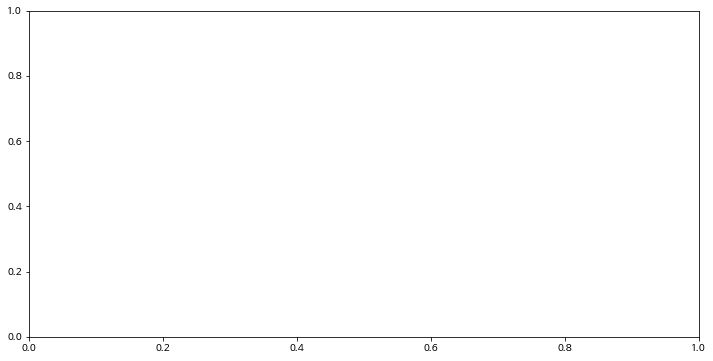

In [13]:
target_age_list = ['10대', '20대', '30대', '40대', '50세 이상']
year_list = [2019, 2020]
weekday_or_weekend = ['주중', '주말'] 

for target_year in year_list:
    for target_age in target_age_list:
        for what_day in weekday_or_weekend:
            fig, ax = plt.subplots(figsize=(12,6))
            sns.set_palette('pastel')
            sns.countplot(x=f'ott {what_day} 이용시간대', hue='성별',
                          order=order, data=merged_df[(merged_df['연령'] == target_age) & (merged_df['연도']==target_year)])
            ax.set_title(f'{target_age} ott {what_day} 이용시간대 {target_year}', pad=15)
            ax.set_xlabel('이용 시간대', labelpad=15)
            ax.set_ylabel('이용 인원 (명)', labelpad=15)

                    # legend
            ax.legend(loc='upper left')

            for bar in ax.patches:
                # The text annotation for each bar should be its height.
                bar_value = bar.get_height()
                # Format the text with commas to separate thousands. You can do
                # any type of formatting here though.
                if bar_value > 0:
                    text = f'{int(bar_value):,}'
                    text_y = bar.get_y() + bar_value
                else:
                    text = 0
                    text_y = 0

                text_x = bar.get_x() + bar.get_width() / 2

                bar_color = bar.get_facecolor()
                ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                      size=12)

# 성별별 ott 주중, 주말 이용시간 

In [ ]:
year_list = [2019, 2020]
weekday_or_weekend = ['주중', '주말']

for target_year in year_list:
    for what_day in weekday_or_weekend:
        fig, ax = plt.subplots(figsize=(12,6))
        sns.set_palette('pastel')
        sns.countplot(x=f'ott {what_day} 이용시간대', hue='성별', order=order, data=merged_df[merged_df['연도'] == target_year])
        plt.title(f'남녀별 ott {what_day} 이용시간대 {target_year}')
        
        # legend
        ax.legend(loc='upper left')

        for bar in ax.patches:
            # The text annotation for each bar should be its height.
            bar_value = bar.get_height()
            # Format the text with commas to separate thousands. You can do
            # any type of formatting here though.
            if bar_value > 0:
                text = f'{int(bar_value):,}'
                text_y = bar.get_y() + bar_value
            else:
                text = 0
                text_y = 0

            text_x = bar.get_x() + bar.get_width() / 2
 
            bar_color = bar.get_facecolor()
            ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
                  size=12)

#  연도별 성비

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.set_palette("hls", n_colors=4)
sns.countplot(x='성별', hue='연도', data=merged_df, palette=['wheat', 'goldenrod'])
# plt.title('10대 ott 주중 이용시간대')
ax.set_xlabel('성별', labelpad=15)
ax.set_ylabel('인원 수 (명)', labelpad=15)
ax.set_title(f'2019 - 2020 남여별 ott 이용자 수', pad=15)

# legend
ax.legend(loc='upper left')

for bar in ax.patches:
    # The text annotation for each bar should be its height.
    bar_value = bar.get_height()
    # Format the text with commas to separate thousands. You can do
    # any type of formatting here though.
    if bar_value > 0:
        text = f'{int(bar_value):,}'
        text_y = bar.get_y() + bar_value
    else:
        text = 0
        text_y = 0

    # This will give the middle of each bar on the x-axis.
    text_x = bar.get_x() + bar.get_width() / 2
    # get_y() is where the bar starts so we add the height to it.

#         text_y = bar.get_y() + bar_value

    # If we want the text to be the same color as the bar, we can
    # get the color like so:
    bar_color = bar.get_facecolor()
    ax.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color,
          size=12)

In [ ]:

num_2019 = merged_df[merged_df['연도'] == 2019 ]['성별'].count()
num_2020 = merged_df[merged_df['연도'] == 2020 ]['성별'].count()

num_male_2019 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2019)]['성별'].count()
num_female_2019 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2019)]['성별'].count()
num_male_2020 = merged_df[(merged_df['성별'] == '남') & (merged_df['연도'] == 2020)]['성별'].count()
num_female_2020 = merged_df[(merged_df['성별'] == '여') & (merged_df['연도'] == 2020)]['성별'].count()


num_male_pct_2019 = round((num_male_2019/(num_male_2019+num_female_2019))*100,1)
num_female_pct_2019 = round((num_female_2019/(num_male_2019+num_female_2019))*100,1)
num_male_pct_2020 = round((num_male_2020/(num_male_2020+num_female_2020))*100,1)
num_female_pct_2020 = round((num_female_2020/(num_male_2020+num_female_2020))*100,1)


fig, ax = plt.subplots(figsize=(12,6))


    # Pie chart
labels = ['2019년', '2020년']
sizes = [num_2019, num_2020]
    #colors
colors = ['wheat', 'goldenrod']
#explsion
# explode = (0.05, 0.05)

sizes_gender = [num_male_2019, num_female_2019, num_male_2020, num_female_2020]
labels_gender = [f'{num_male_pct_2019}%', f'{num_female_pct_2019}%', f'{num_male_pct_2020}%', f'{num_female_pct_2020}%']
colors_gender = ['#66b3ff', '#ff6666', '#66b3ff', '#ff6666']
 
pie1 = plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', radius=1.15, startangle=90, pctdistance=0.85)
# plt.pie(sizes_gender, colors=colors_gender, autopct='%1.1f%%', radius=0.83, startangle=90, pctdistance=0.75)
pie2 = plt.pie(sizes_gender, colors=colors_gender, labels=labels_gender, radius=0.83, startangle=90, labeldistance=0.65)




#draw circle
centre_circle = plt.Circle((0,0),0.50,fc='white')
centre_circle.set_alpha(1.0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  
plt.tight_layout()
plt.title('연도별 ott 사용자 비율')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:], ['2019년', '2020년', '남', '여'])

plt.show()